In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 500)

df = pd.read_excel('final_dataset_20-21.xlsx')

df.rename(columns=lambda x: x.replace(" (20/21)", ""), inplace=True)


df['Contract Years Left'] = pd.to_numeric(df['Contract Years Left'], errors='coerce')
df['Value'] = df['Value'] / 1000000

df_numeric = df.select_dtypes(include=[np.number])

df_numeric

,Age,Value,Contract Years Left,MP,Starts,Min,Total Mins/90,Gls,Ast,Non-Penalty Goals,...,Offsides,Crosses,Interceptions,Penalty Kicks Won,Penalties Conceded,Own Goals,Total Loose Balls Recovered,Aerial Duel Won,Aerial Duel Lost,% Aerial Duels Won
0,22,144.000,1.0,31.0,27.0,2380.0,26.4,27.0,7.0,21.0,...,17.0,68.0,7.0,4.0,0.0,0.0,109.0,7.0,8.0,46.7
1,21,117.000,3.0,28.0,27.0,2407.0,26.7,27.0,6.0,25.0,...,15.0,13.0,5.0,0.0,0.0,0.0,96.0,37.0,40.0,48.1
2,28,108.000,3.0,35.0,35.0,3082.0,34.2,23.0,14.0,19.0,...,12.0,37.0,15.0,2.0,0.0,0.0,155.0,90.0,129.0,41.1
3,21,90.000,5.0,26.0,24.0,2062.0,22.9,8.0,11.0,7.0,...,9.0,52.0,14.0,0.0,0.0,0.0,154.0,5.0,22.0,18.5
4,29,90.000,2.0,37.0,34.0,3078.0,34.2,22.0,5.0,16.0,...,13.0,47.0,9.0,2.0,0.0,0.0,191.0,21.0,52.0,28.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,22,0.180,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2071,26,0.135,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2072,23,0.090,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,36,0.090,1.0,3.0,2.0,239.0,2.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,NaN


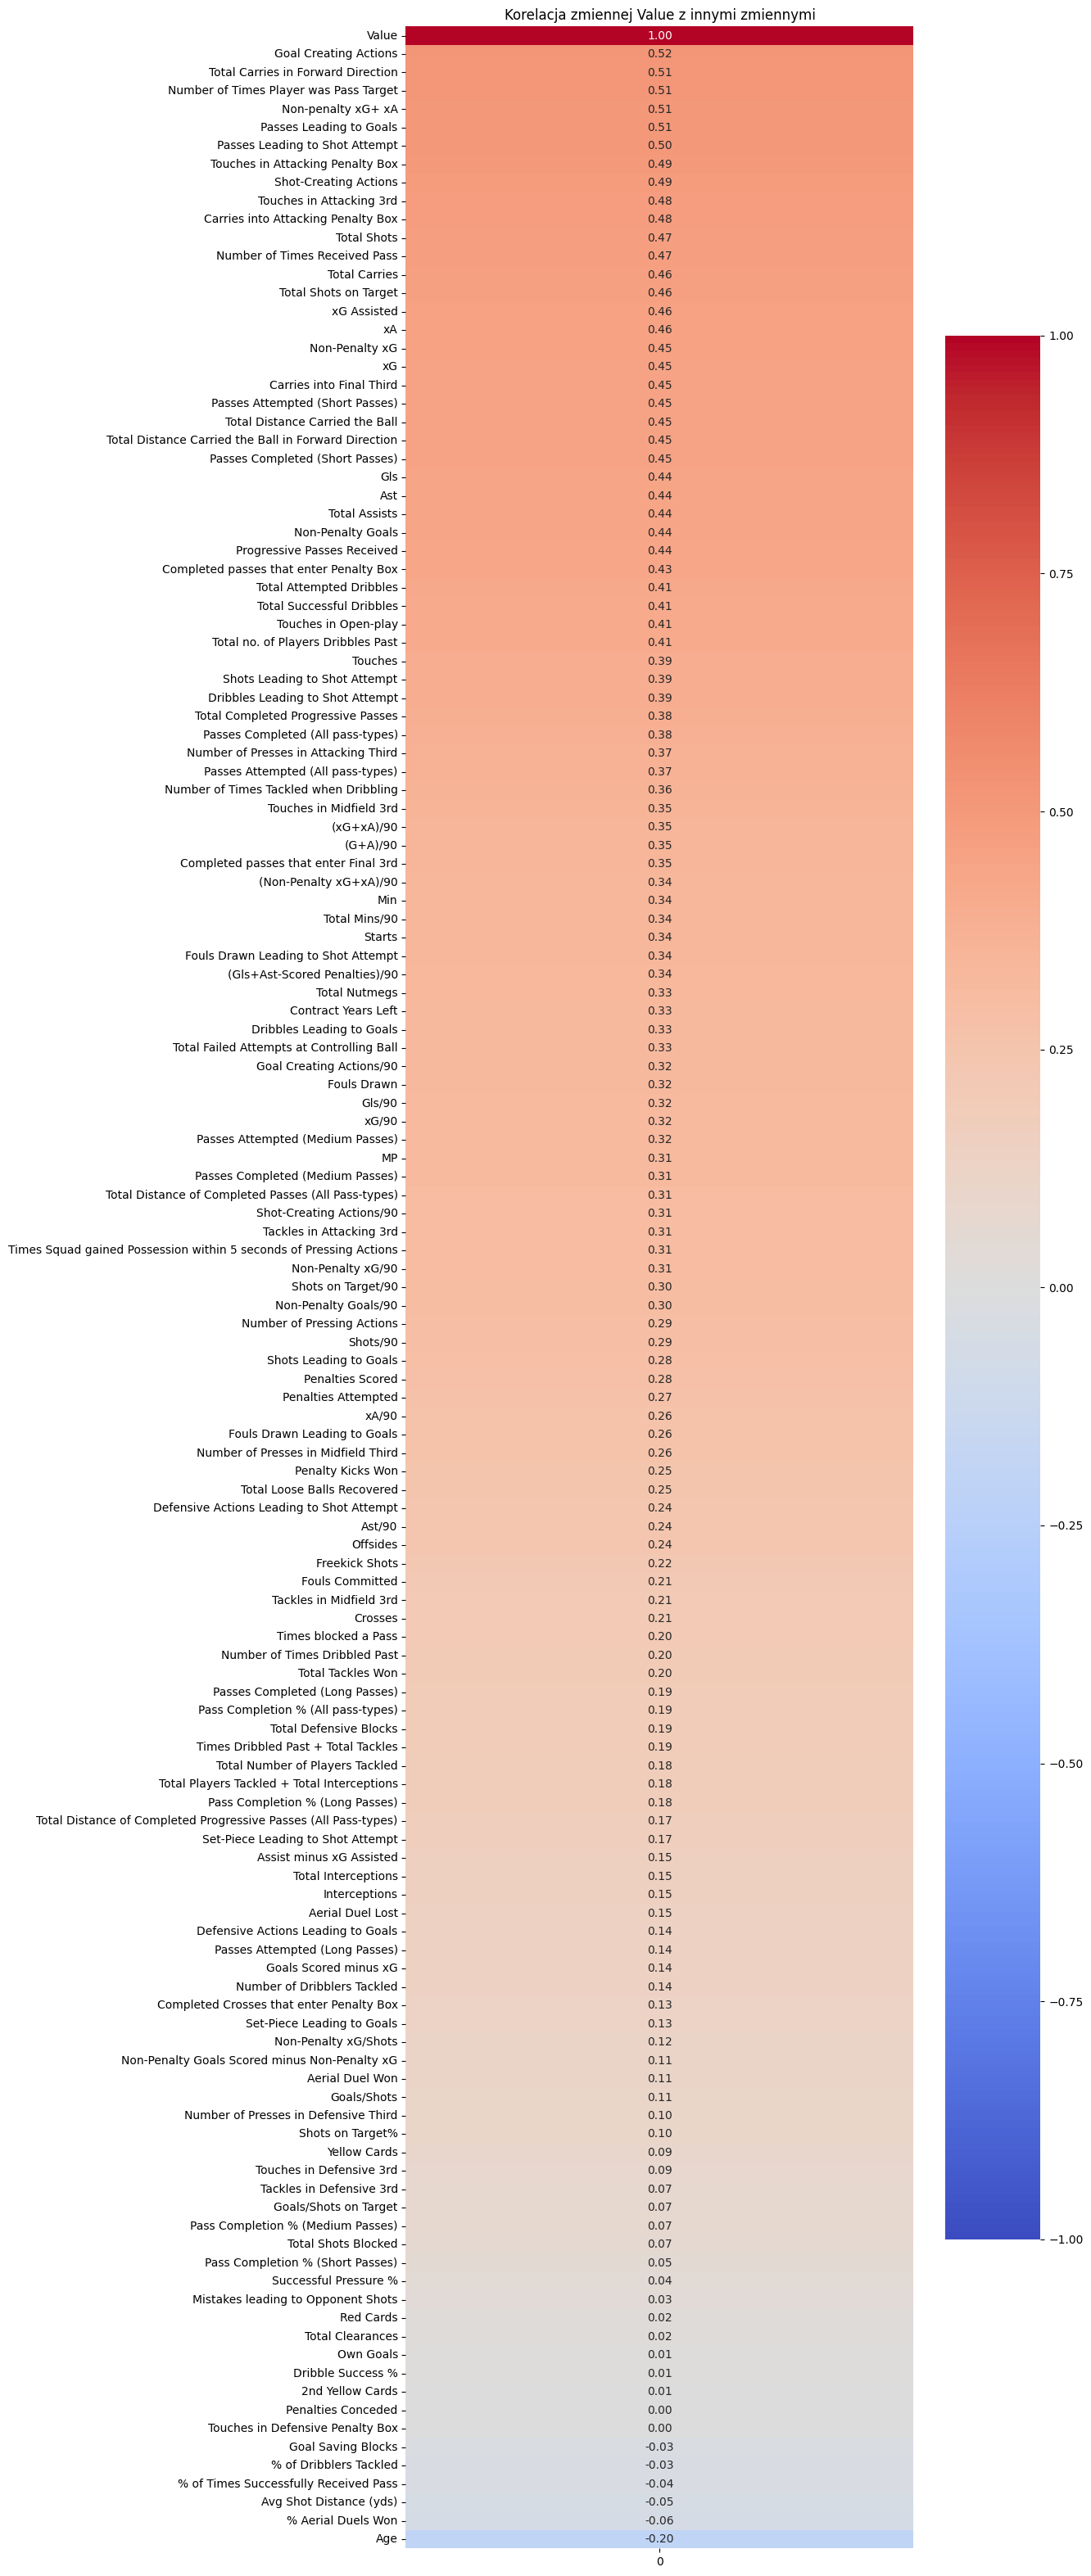

In [16]:

# Obliczanie macierzy korelacji względem 'Value'
correlation_matrix = df_numeric.corr()['Value'].sort_values(ascending=False)

# Konwertowanie pandas Series do tablicy NumPy dla właściwego formatowania w seaborn
correlation_matrix_np = correlation_matrix.values.reshape(-1, 1)  # Zmiana kształtu na kolumnowy

# Tworzenie wykresu korelacji
plt.figure(figsize=(10, 40))  # Możesz dostosować rozmiar dla lepszej czytelności
sns.heatmap(correlation_matrix_np, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f",
            yticklabels=correlation_matrix.index)  # Etykiety kolumn są ważne dla identyfikacji zmiennych
plt.title('Korelacja zmiennej Value z innymi zmiennymi')
plt.show()